* school - 이진 - 학교 - "GP", "MS"
* sex - 이진 - 남여 - "F", "M"
* age - int - 나이 - 15~22
* address - 이진 - 도시/시골 - "U", "R"
* famsize - 이진 - 가족인원 작/크 -'LE3''GT3'
* Pstatus - 이진 - 부모님과 함께/따로 - "T", "A"
<br></br>
    (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Mjob - 명목 - 모 직업
* Fjob - 명목 - 부 직업
<br></br>
* reason - 명목 - 학교를 선택한 이유 - 'home' 'reputation' 'course','other')
* guardian - 명목 - 보호자 - 'mother','father','other'
<br></br>
    (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – * higher education)
* Medu - int - 모 최종학력
* Fedu - int - 부 최종학력
<br></br>
* traveltime - int - 통학시간 - (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - int - 주당 공부시간 ( 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - int - 낙제 횟수 - 1,2,3 4~
* absences - int - 결석 횟수 - numeric: from 0 to 93)
<br></br>
     (yes or no)
* schoolsup - 이진 - 추가 교육 지원
* famsup - 이진 - 부모 교육 지원
* paid - 이진 - 사교육여부
* activities - 이진 - 교과 외 활동
* nursery - 이진 - 보육원 출신
* higher - 이진 - 목표의식
* internet - 이진 - 인터넷
* romantic - 이진 - 연애
<br></br>
    (1 - very bad to 5 - excellent)
* famrel - int - 가족들의 관계
* freetime - int - 방과후 남는시간
* goout - int - 친구들과 놀러가기
* Dalc - int - 평일 알콜소비
* Walc - int - 주말 알콜소비
* health - int - 건강상태
<br></br>
* GT_Mat - int - 1~3학년 총점
* G1_Mat - int - 1학년 점수 
* G2_Mat - int - 2학년 점수
* G3_Mat - int - 3학년 점수
<br></br>
* GT_rank - int - 1~3학년 총점 등수
* G1_rank - int - 1학년 총점 등수
* G2_
rank - int - 2학년 총점 등수
* G3_rank - int - 3학년 총점 등수
<br></br>
    등급표 9단계 [-4,-11,-23,-40,-60,-77,-89,-96,-100]
* GT_rank_bin - int - 1~3학년 총점 등급
* G1_rank_bin - int - 1학년 등급
* G2_rank_bin - int - 2학년 등급
* G3_rank_bin - int - 3학년 등급

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

sns.set(rc = {"figure.figsize" : (15,8)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [80]:
def distribution_by(data,feature,target, size=(6,4),fig=True, title=None):
    if fig:
        plt.figure(figsize=size)
    ax = sns.countplot(x=feature,
                 data=data,
                 hue = target,
                 palette="pastel")
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f"{feature} Distribution by {target}")
    ax.legend(title=target,title_fontsize="small",fontsize="small")
    write_percent(ax, len(data))
        
def write_percent(ax, total_size):
    # total_size는 데이터의 길이 len(df) 를 사용하면 된다.
    
    # patch 그래프 막대 0~
    for patch in ax.patches:
        height = patch.get_height() # 높이(데이터 개수)
        width = patch.get_width() # 너비
        left_coord = patch.get_x() # 왼족 테두리의 x 좌표
        percent = height/total_size*100 # 타겟값 비율
        
        ax.text(x=left_coord + width/2.0, # x 축 위치
                y=height+total_size*0.003, # y 축 위치
                s=f"{percent : 1.1f}%", # 입력될 텍스트
                ha="center") # 가운데 정렬

def get_crosstab(df, feature, target="target"):
    # 교차분석표
    crosstab = pd.crosstab(df[feature], df[target], normalize="index")*100
    crosstab = crosstab.reset_index()
    return crosstab

def plot_pointplot(ax, feature, crosstab):
    
    # 이미 그려진 countplot 위에 덧그리기 
    ax2= ax.twinx() # x 축은 공유하고 y 축은 공유하지 않는 새로운 축
    
    #새로운 축에 plot 그리기
    ax2= sns.pointplot(x=feature, y=1, data=crosstab,
                      order=crosstab[feature].values, # 포인트 플롯의 순서
                      color="black", # 포인트 플롯의 색상
                      legend=False,) # 범례표시 x
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel("Target 1 Ratio (%)")
    
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, target="target",size=(15,20)):

    import matplotlib.gridspec as gridspec

    plt.figure(figsize=size) # 전체 그래프의 크기
    grid = gridspec.GridSpec(num_rows, num_cols) #  서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 좌우/ 상하 여백
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx]) # x 번째 grid 그래프
        crosstab = get_crosstab(df, feature, target=target) # 교차 분석표 작성
        
        # ax축에 그래프 그리기
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color="skyblue",
                     ax=ax)
        
        write_percent(ax, len(df)) # 비율 표시
        
        plot_pointplot(ax, feature, crosstab) # ax2축에 포인트 플랏그리기
        
        ax.set_title(f"{feature} Distribution") # 타이틀 설정
        
def ordinal_encoding(all_data, features):
    from sklearn.preprocessing import OrdinalEncoder

    ord_encoder = OrdinalEncoder()

    all_data[features] = ord_encoder.fit_transform(all_data[features])

    for feature, categories in zip(features, ord_encoder.categories_):
        print(feature)
        print(categories)
    return all_data

def plot_target_ratio_by_features(df, features, num_rows, num_cols, target="target",size=(12,18)):
    
    # 이진피처에 이용할 수 있는 막대그래프를 그림
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.gridspec as gridspec
    
    plt.rc("font", size=8)
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for idx, features in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=features, y=target, data=df, palette="Set2", ax=ax)

# 1 : 지

In [3]:
math = pd.read_csv("math.csv")

In [89]:
port = pd.read_csv("port.csv")
port.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por,subject,GT_Por,GT_rank,G1_rank,G2_rank,G3_rank
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,port,22,609,649,319,349
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,port,31,422,493,319,349
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,port,37,239,225,153,277


## 이진 피쳐들이 총 성적에 미치는 영향

In [4]:
bin_feature = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
               'internet', 'romantic', 'school', 'sex', 'address', 'famsize', 'Pstatus']

nom_feature = ["Mjob","Fjob","reason","guardian"]

cat_feature = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

num_feature = ['age', 'absences']

g_num_feature = ['GT_Mat', 'G1_Mat', 'G2_Mat', 'G3_Mat', 'GT_rank', 'G1_rank', 'G2_rank', 'G3_rank']
g_ord_feature = ['GT_rank_bin', 'G1_rank_bin', 'G2_rank_bin', 'G3_rank_bin']

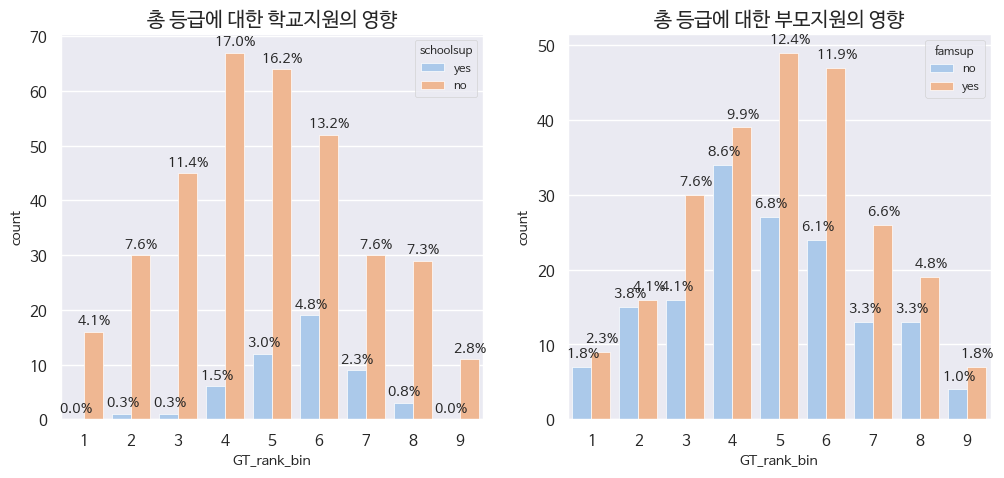

In [34]:
# 학교와 부모의 지원이 성적에 미치는 영향
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
distribution_by(math,"GT_rank_bin","schoolsup",fig=False, title="총 등급에 대한 학교지원의 영향")
plt.subplot(1,2,2)
distribution_by(math,"GT_rank_bin","famsup",fig=False, title="총 등급에 대한 부모지원의 영향")

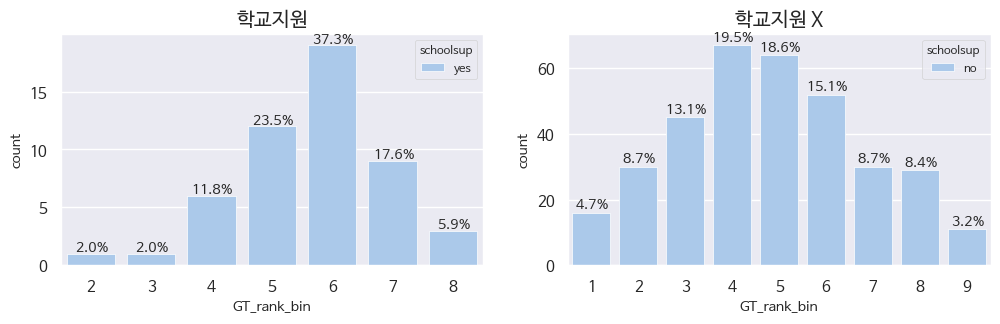

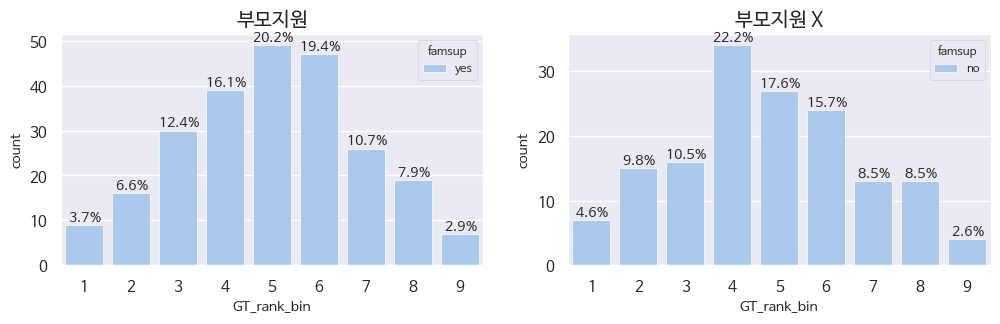

In [35]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
distribution_by(math[math["schoolsup"]=="yes"],"GT_rank_bin","schoolsup",fig=False, title="학교지원")
plt.subplot(1,2,2)
distribution_by(math[math["schoolsup"]=="no"],"GT_rank_bin","schoolsup",fig=False, title="학교지원 X")
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
distribution_by(math[math["famsup"]=="yes"],"GT_rank_bin","famsup",fig=False, title="부모지원")
plt.subplot(1,2,2)
distribution_by(math[math["famsup"]=="no"],"GT_rank_bin","famsup",fig=False, title="부모지원 X")

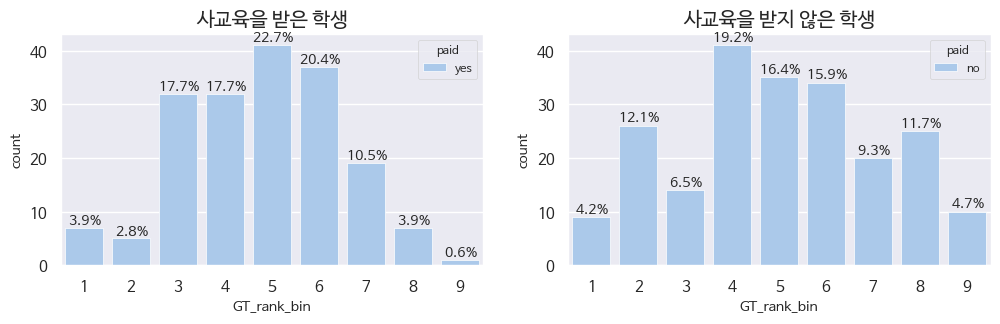

In [36]:
## 사교육이 성적에 미치는 영향
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
distribution_by(math[math["paid"]=="yes"],"GT_rank_bin","paid",fig=False,title="사교육을 받은 학생")
plt.subplot(1,2,2)
distribution_by(math[math["paid"]=="no"],"GT_rank_bin","paid",fig=False,title="사교육을 받지 않은 학생")

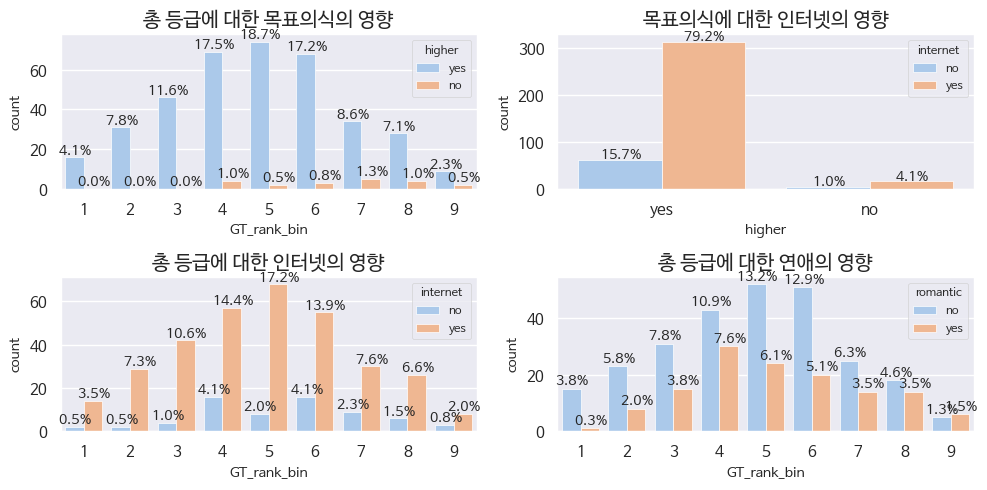

In [63]:
## 목표의식이 성적에 미치는 영향
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
distribution_by(math,"GT_rank_bin","higher",fig=False, title="총 등급에 대한 목표의식의 영향")
plt.subplot(2,2,2)
distribution_by(math,"higher","internet",fig=False, title="목표의식에 대한 인터넷의 영향")
plt.subplot(2,2,3)
distribution_by(math,"GT_rank_bin","internet",fig=False, title="총 등급에 대한 인터넷의 영향")
plt.subplot(2,2,4)
distribution_by(math,"GT_rank_bin","romantic",fig=False, title="총 등급에 대한 연애의 영향")
plt.tight_layout()

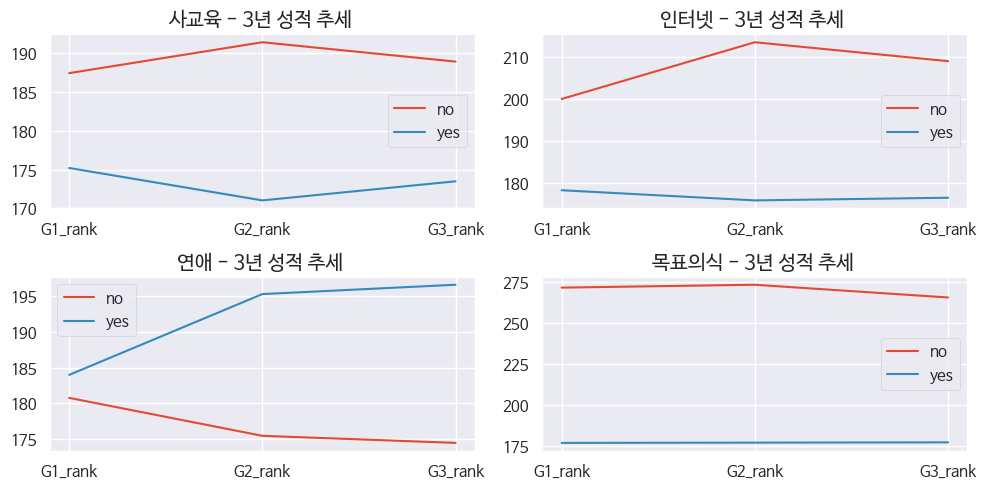

In [74]:
## 성적추이
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
df = math[["G1_rank","G2_rank","G3_rank","paid"]].groupby(by=["paid"]).mean()
plt.plot(df.T)
plt.title("사교육 - 3년 성적 추세 ")
plt.legend(df.index)

plt.subplot(2,2,2)
df = math[["G1_rank","G2_rank","G3_rank","internet"]].groupby(by=["internet"]).mean()
plt.plot(df.T)
plt.title("인터넷 - 3년 성적 추세 ")
plt.legend(df.index)

plt.subplot(2,2,3)
df = math[["G1_rank","G2_rank","G3_rank","romantic"]].groupby(by=["romantic"]).mean()
plt.plot(df.T)
plt.title("연애 - 3년 성적 추세 ")
plt.legend(df.index)

plt.subplot(2,2,4)
df = math[["G1_rank","G2_rank","G3_rank","higher"]].groupby(by=["higher"]).mean()
plt.plot(df.T)
plt.title("목표의식 - 3년 성적 추세 ")
plt.legend(df.index)

plt.tight_layout()

AttributeError: 'list' object has no attribute 'text'

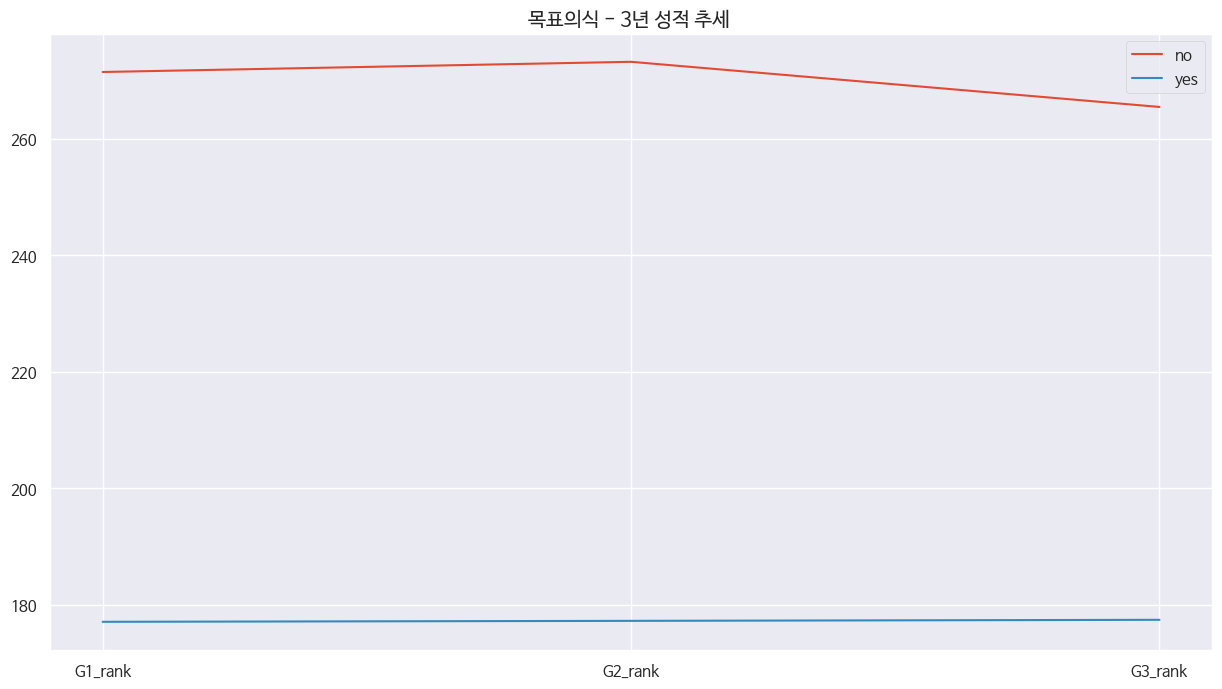

In [87]:
df = math[["G1_rank","G2_rank","G3_rank","higher"]].groupby(by=["higher"]).mean()
ax = plt.plot(df.T)
plt.title("목표의식 - 3년 성적 추세 ")
plt.legend(df.index)
ax.text(1,"HI")

<Axes: xlabel='address'>

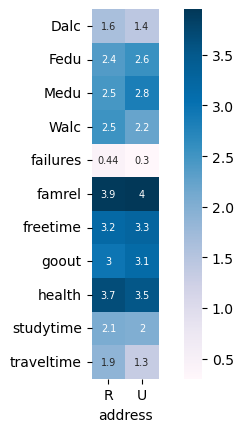

In [75]:
# 가족과 연관있는 특성
cols = ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']





# 1. 성적별 전반적 시각화 

## 1-1) 1,2,3 학년 전체 등급별 시각화

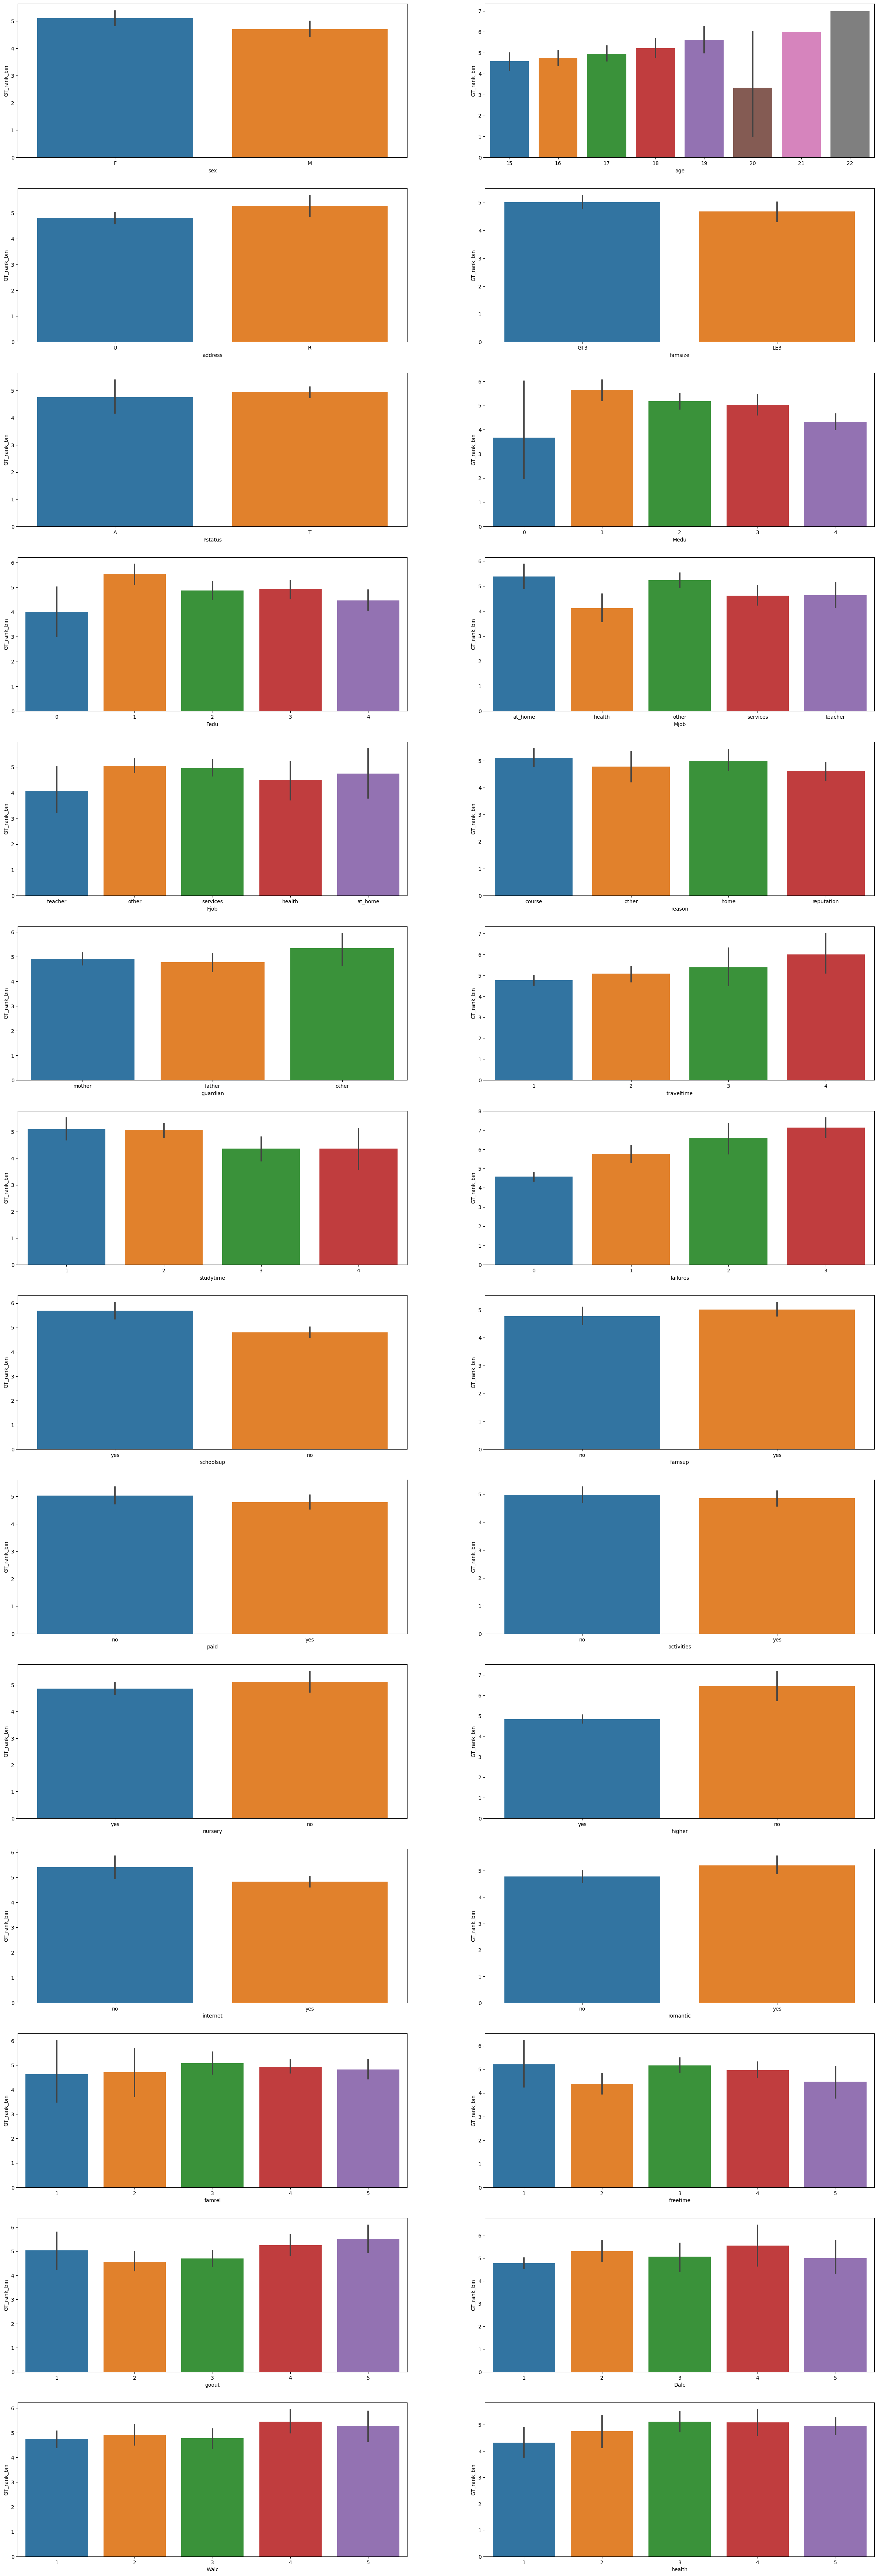

In [76]:
cols = ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']


fig, axes = plt.subplots(nrows=14, ncols=2)
axes = axes.flatten()
fig.set_size_inches(30,90)

for idx, col in enumerate(cols):
    sns.barplot(data=math, x=col, y="GT_rank_bin",ax=axes[idx],estimator="mean")

## 상위 1,2 등급과 8,9 등급의 비교

In [30]:
math1289 = pd.concat([math[math["GT_rank_bin"] > 7],math[math["GT_rank_bin"] < 3]], axis=0)

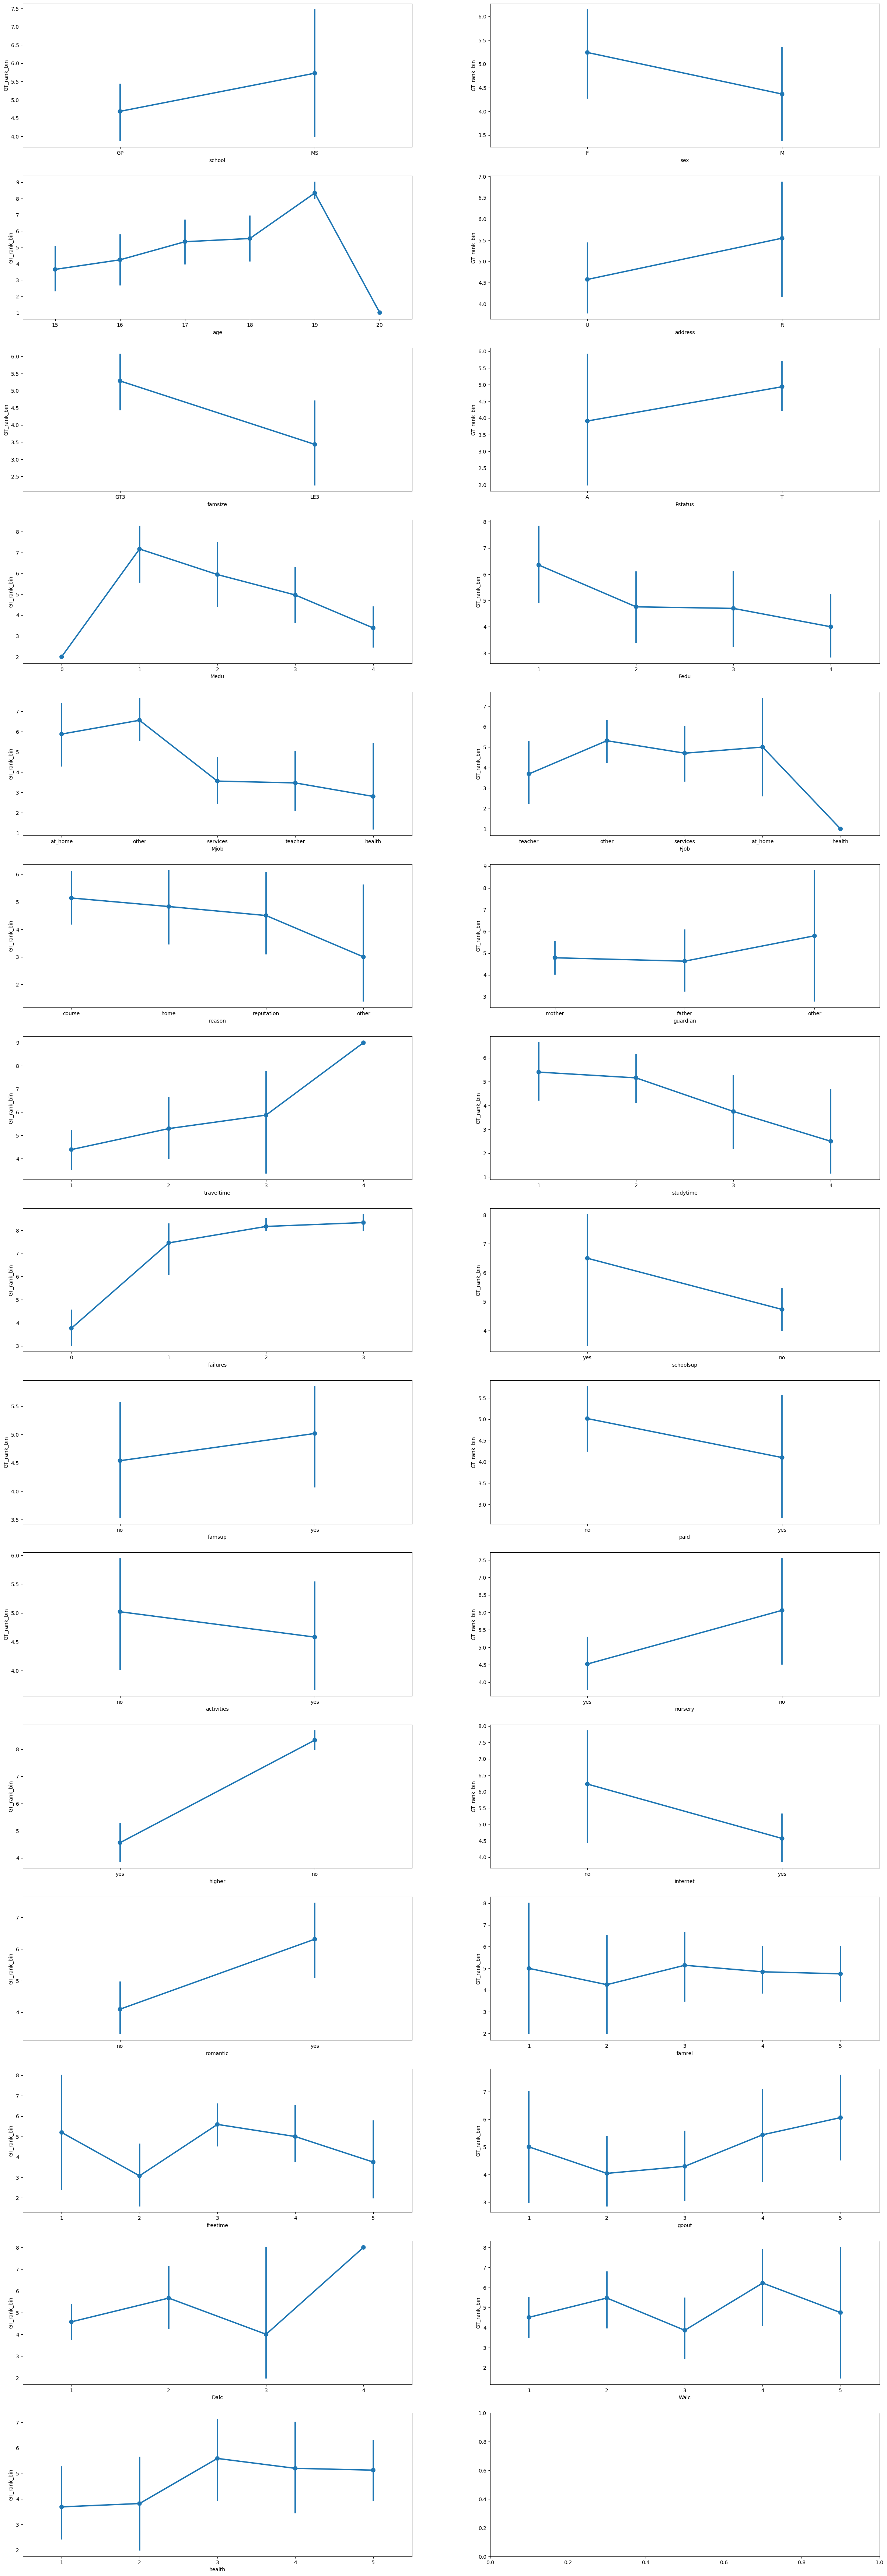

In [46]:
cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']


fig, axes = plt.subplots(nrows=15, ncols=2)
axes = axes.flatten()
fig.set_size_inches(30,90)

for idx, col in enumerate(cols):
    sns.pointplot(data=math1289,x=col, y="GT_rank_bin",ax=axes[idx])

<Axes: xlabel='age'>

<Figure size 1500x800 with 0 Axes>

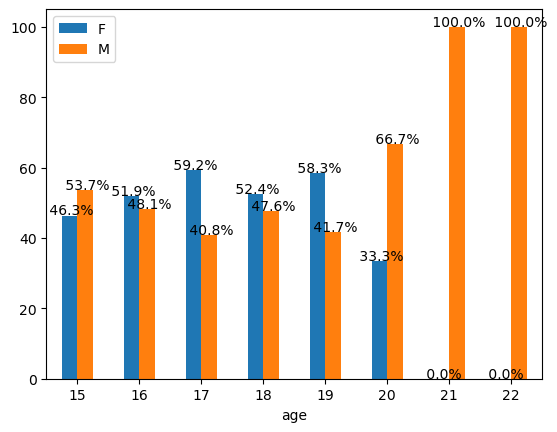

In [187]:
#나이별 성비
get_crosstab_plot(math, feature='age',target="sex")

In [36]:
math1289

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Mat,G2_Mat,G3_Mat,subject,GT_Mat,GT_rank,G1_rank,G2_rank,G3_rank,GT_rank_bin,G1_rank_bin,G2_rank_bin,G3_rank_bin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math,17,353,387,353,335,8,9,8,7
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math,16,358,387,367,335,8,9,8,7
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,math,17,353,363,367,335,8,8,8,7
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,no,yes,yes,yes,yes,no,5,5,5,2,4,5,16,6,5,5,math,16,358,363,367,350,8,8,8,7
79,GP,F,16,U,GT3,T,3,4,at_home,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,4,3,1,2,3,12,5,5,5,math,15,366,387,367,350,8,9,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,GP,M,18,R,GT3,T,4,3,teacher,services,course,mother,1,3,0,no,no,no,no,yes,yes,yes,yes,5,3,2,1,2,4,9,16,15,16,math,47,30,20,34,25,2,2,2,2
359,MS,F,18,U,LE3,T,1,1,at_home,services,course,father,2,3,0,no,no,no,no,yes,yes,yes,no,5,3,2,1,1,4,0,18,16,16,math,50,19,4,21,25,2,1,2,2
363,MS,F,17,U,LE3,T,4,4,at_home,at_home,course,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,yes,2,3,4,1,1,1,0,16,15,15,math,46,35,20,34,41,2,2,2,2
374,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19,math,56,2,1,4,2,1,1,1,1


In [50]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat', 'subject',
       'GT_Mat', 'GT_rank', 'G1_rank', 'G2_rank', 'G3_rank'],
      dtype='object')

In [101]:
a = ['school',"sex", 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat', 'subject',
       'GT_Mat', 'GT_rank', 'G1_rank', 'G2_rank', 'G3_rank']
len(a)

39

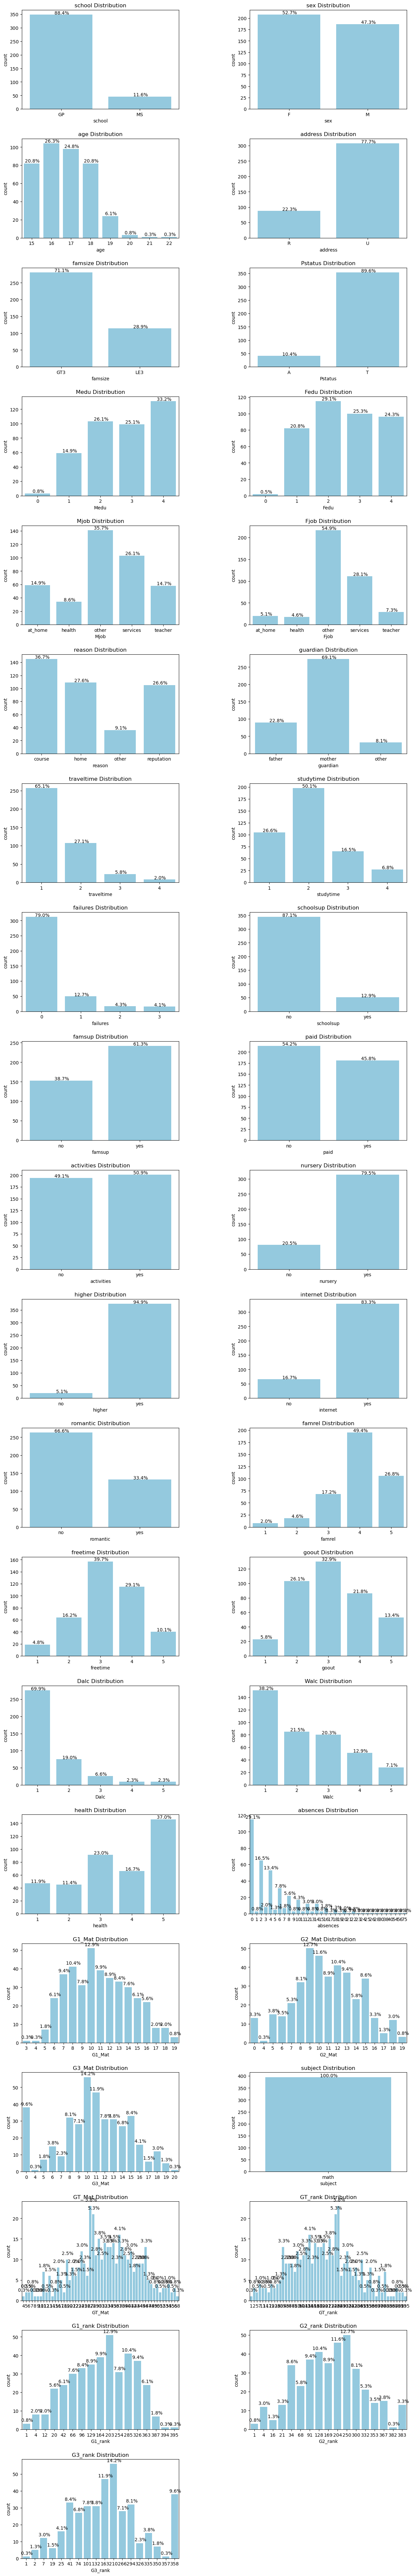

In [103]:
# 데이터 분포
plot_cat_dist_with_true_ratio(math, a, 20, 2,target="subject",size=(15,100))

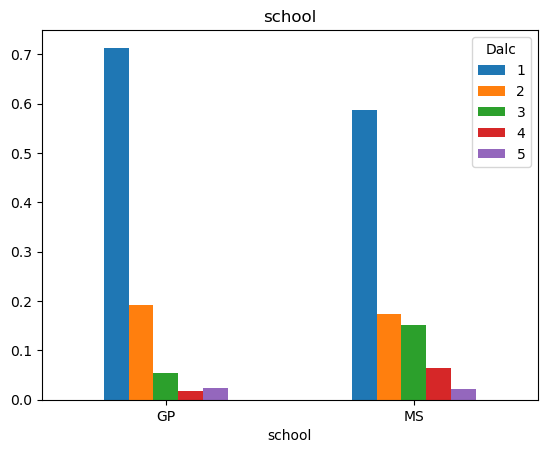

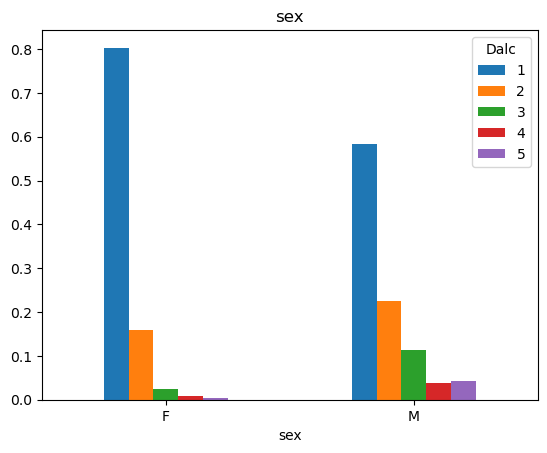

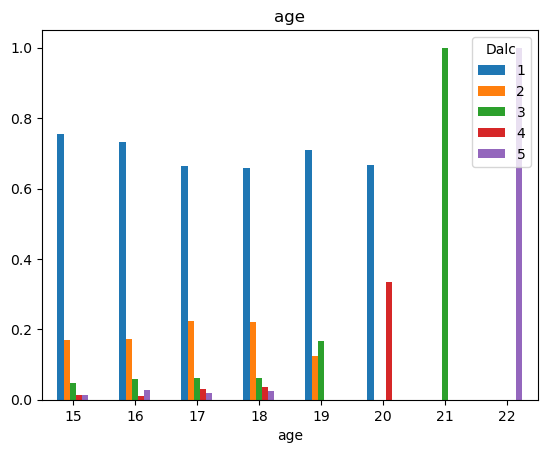

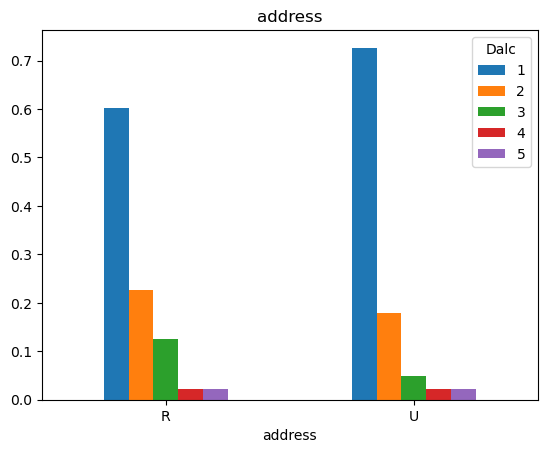

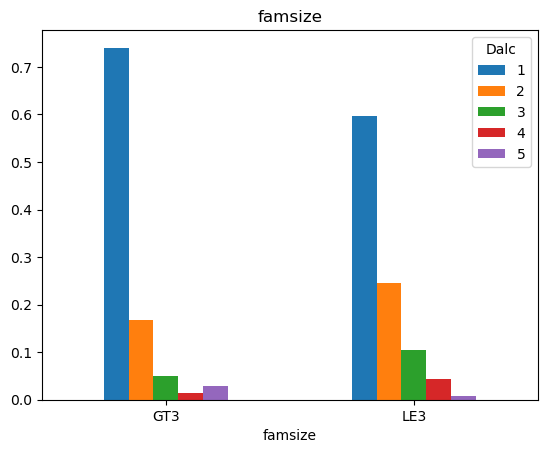

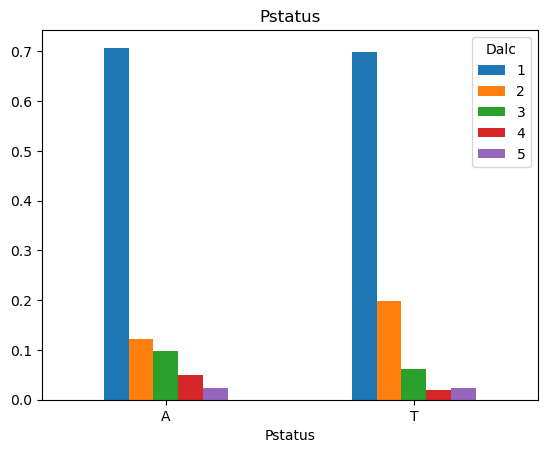

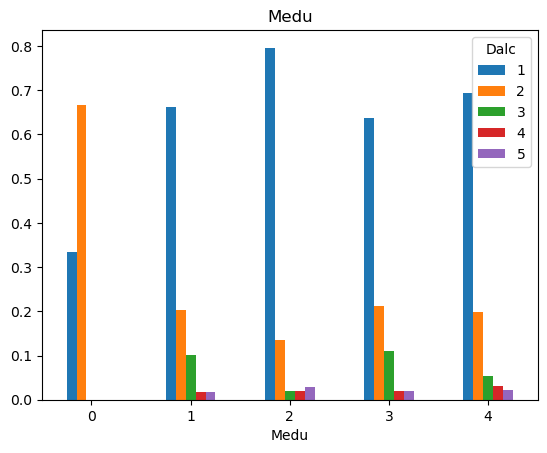

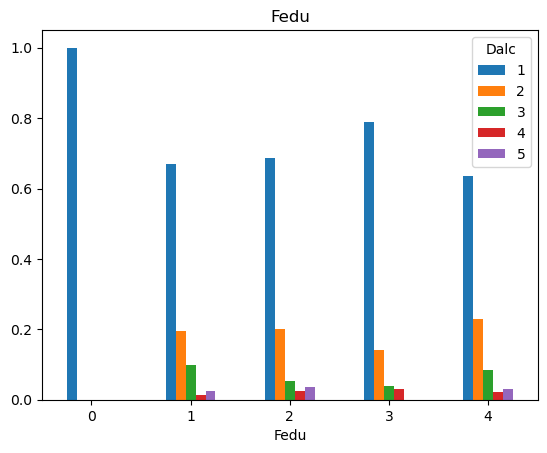

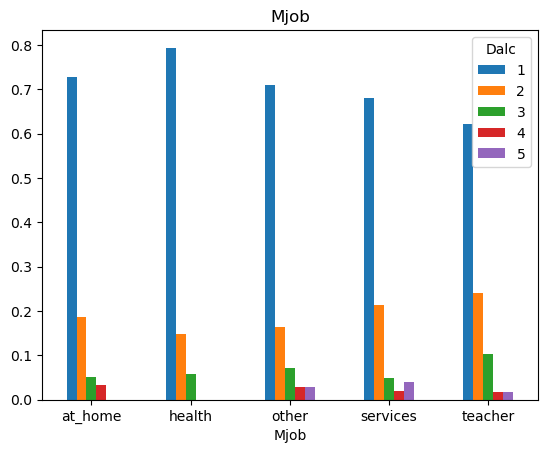

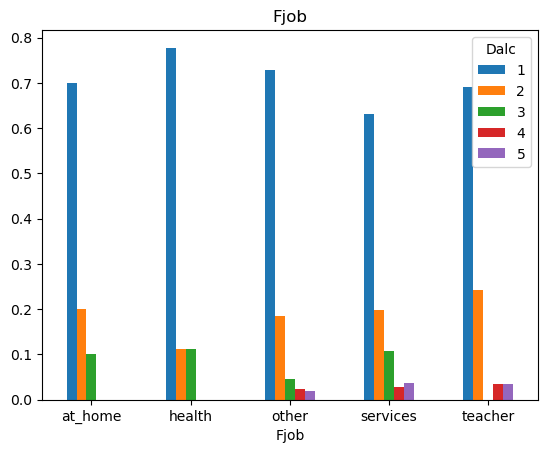

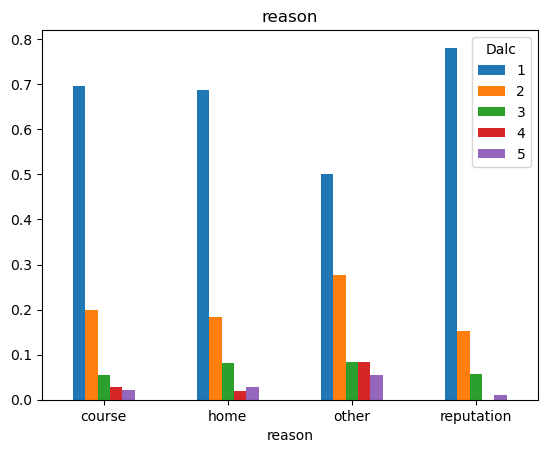

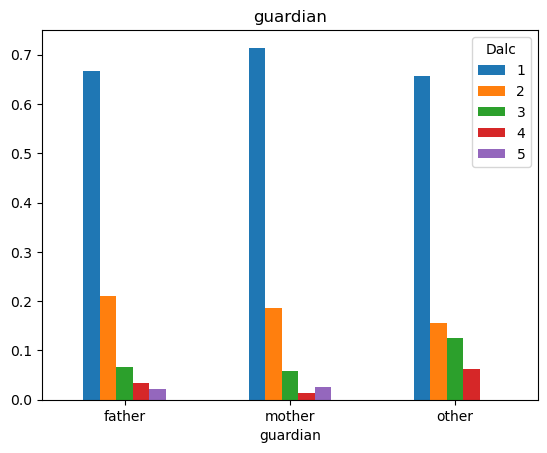

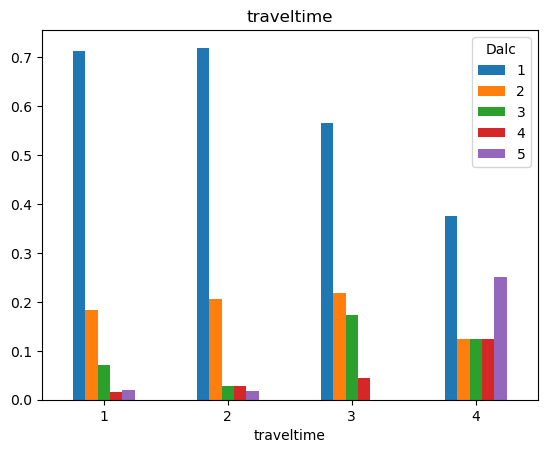

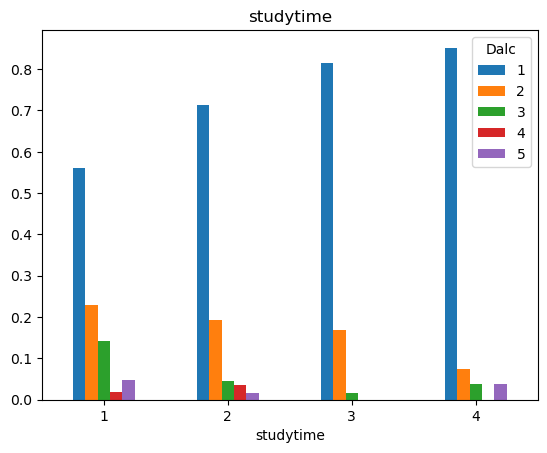

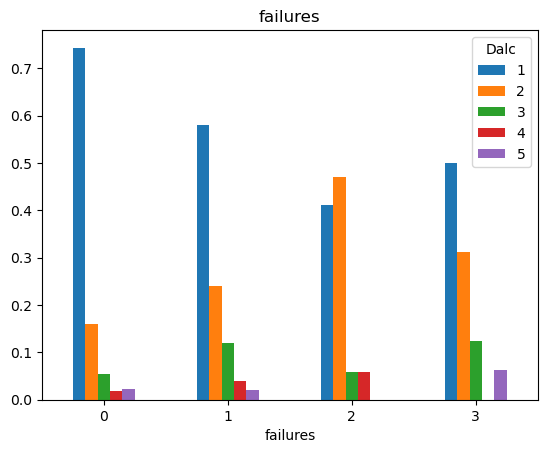

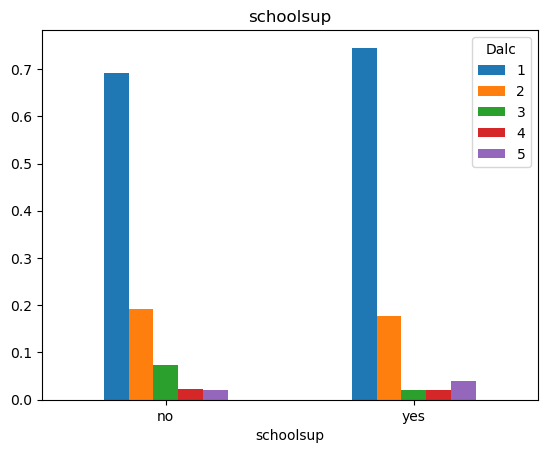

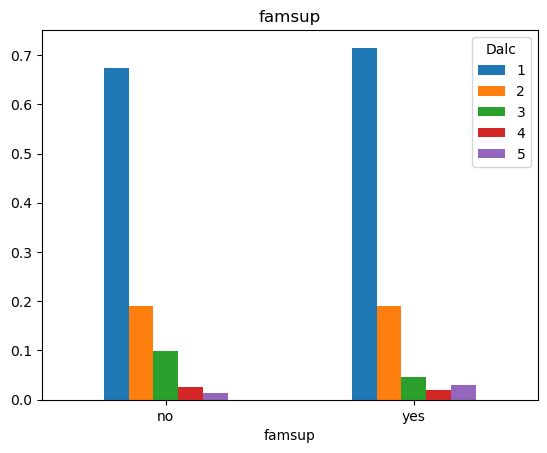

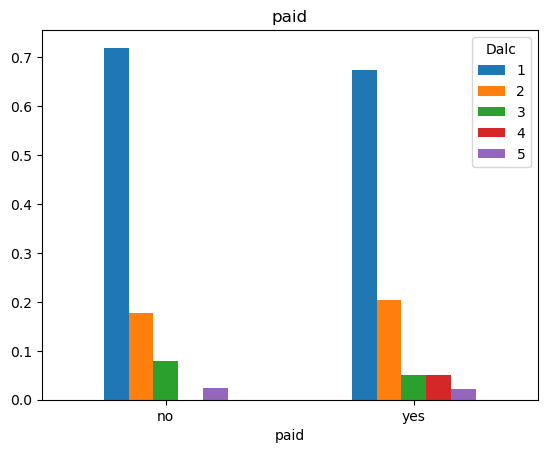

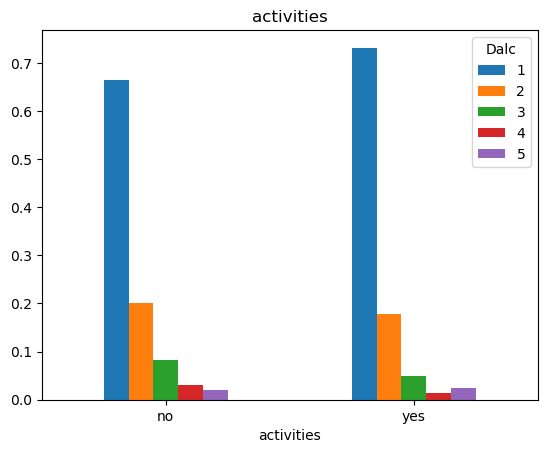

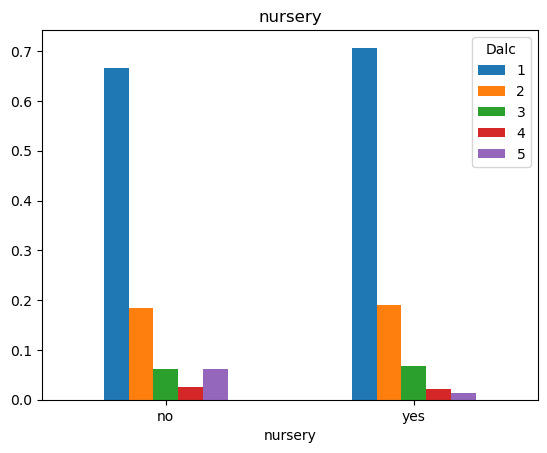

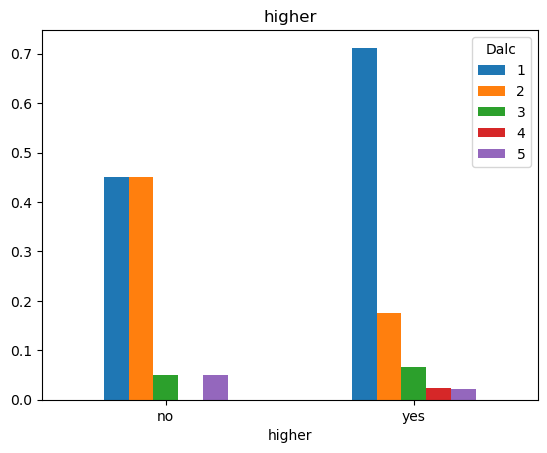

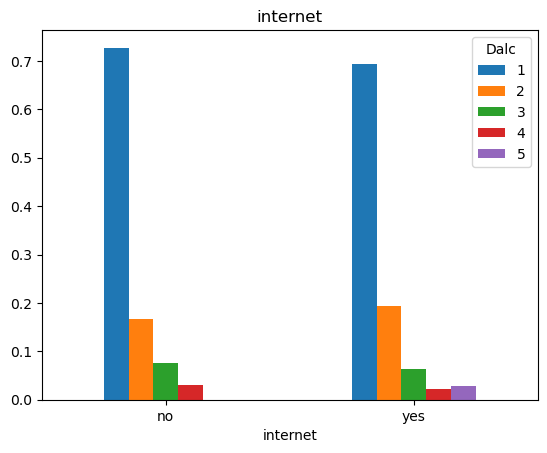

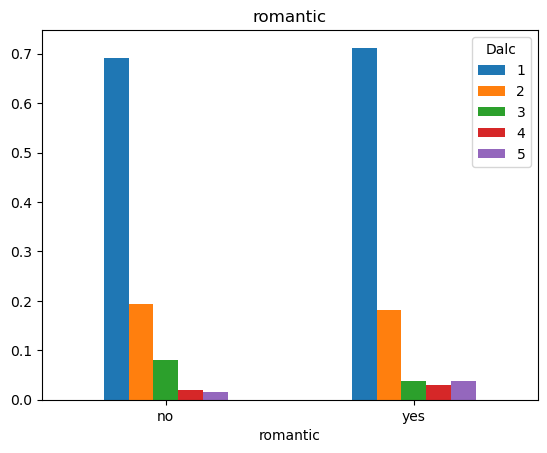

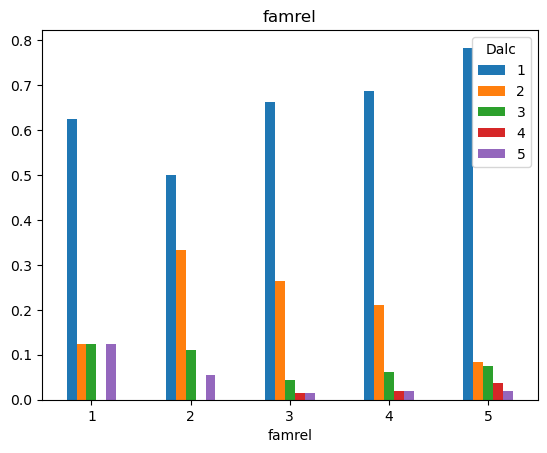

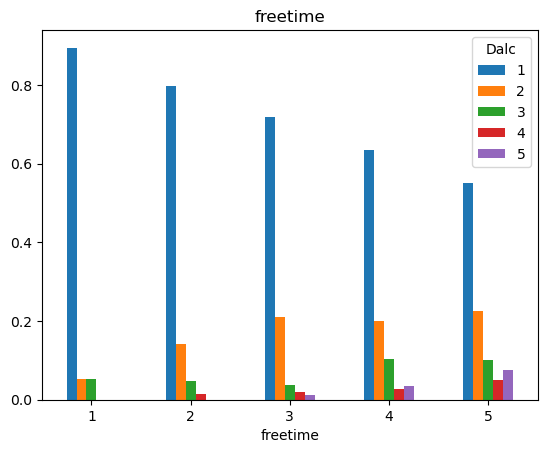

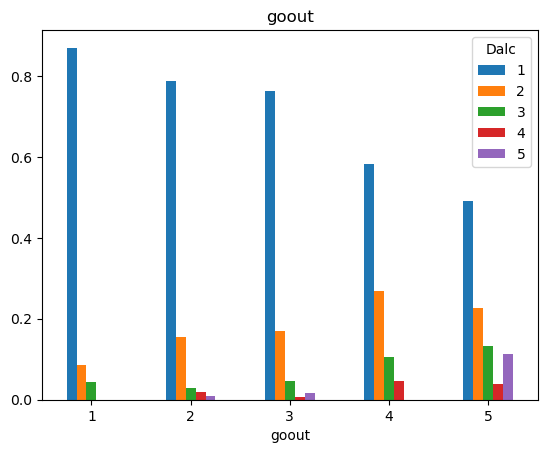

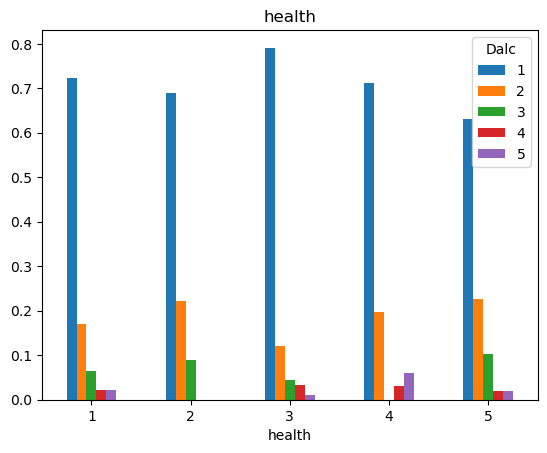

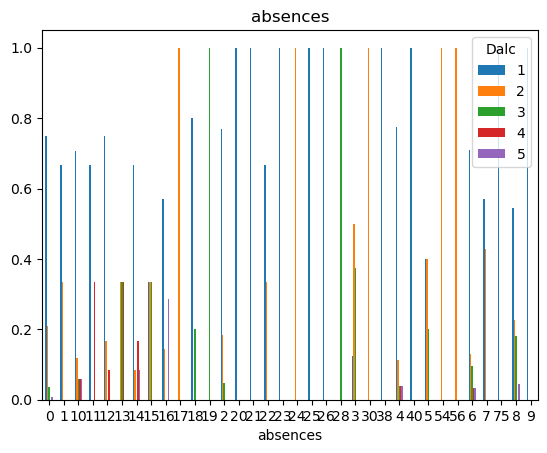

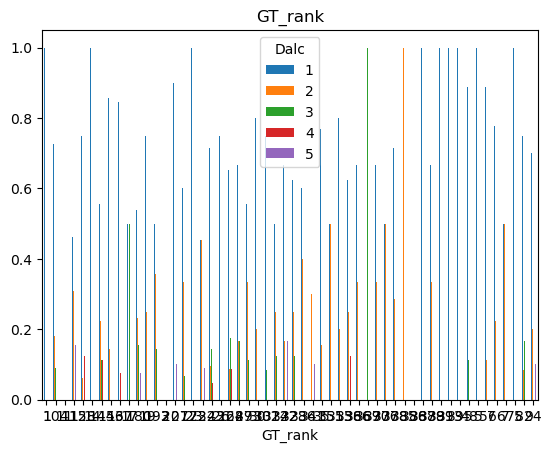

In [58]:
temp = math.drop(['G1_Mat', 'G2_Mat', 'G3_Mat', 'subject','GT_Mat', 'G1_rank', 'G2_rank', 'G3_rank',"Walc"], axis=1)
temp = temp.astype(str)

count_dense_plot(temp, "Dalc")